In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense          # Hidden Layer & Output Layer

import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Part 2 - Fitting the CNN to the images
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"D:\CNN-20250310T051823Z-001\CNN\dataset\training_set",
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'binary') # binary because we have 2 type = cat / dogs

test_set = test_datagen.flow_from_directory(r"D:\CNN-20250310T051823Z-001\CNN\dataset\test_set",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
8000/32  # each group will have 250 image unique

250.0

In [5]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [6]:
from keras import layers

model = tf.keras.models.Sequential([
  ################### CNN - 1 ###################
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2, 2),  ### reduces image dimensions while retaining important information.

    ################### CNN - 2 ###################
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    ################### CNN - 3 ###################

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    ################### CNN - 4 ###################

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    ################### Hidden - 1 ###################

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),  ### helps stabilize training and speed up convergence.
    ################### Hidden - 2 ###################

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1), ### prevent overfitting.
    layers.BatchNormalization(),

    ################### Hidden - 3 ###################
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    ################### Output Layer ###################

    layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 756,801 (2.89 MB)

 Trainable params: 753,729 (2.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [8]:
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(training_set,epochs=10,validation_data=test_set)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 172s 668ms/step - accuracy: 0.5645 - loss: 0.8078 - val_accuracy: 0.5810 - val_loss: 0.6720
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.6175 - loss: 0.6684 - val_accuracy: 0.5005 - val_loss: 1.2201
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.6761 - loss: 0.6158 - val_accuracy: 0.5000 - val_loss: 2.1030
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.7245 - loss: 0.5603 - val_accuracy: 0.5065 - val_loss: 1.6731
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.7535 - loss: 0.5040 - val_accuracy: 0.7240 - val_loss: 0.5888
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.8052 - loss: 0.4341 - val_accuracy: 0.6050 - val_loss: 0.9099
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.8179 - loss: 0.4036 - val_accuracy: 0.7420 - val_loss: 0.6194
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.8225 - loss: 0.3810 

In [9]:
model.save('cat_dog_classifier.keras')

In [11]:
pip install keras_preprocessing

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ------------------- -------------------- 20.5/42.6 kB 217.9 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 414.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [18]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [19]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [20]:
reload_model = load_model("cat_dog_classifier.keras")

In [21]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))   # importing image is converted to 64*64
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = reload_model.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))                # Display Image
    print('Probability : ',Probability)
    if Probability > 0.5:
        print("its a dog")
    else:
        print("its a cat")

In [25]:
# import os 
# os.chdir(r"D:\Python Code\TensorFlow\CNN\cat_dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Probability :  0.9545066
its a dog


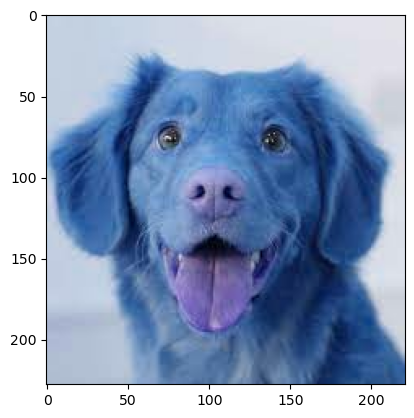

In [27]:
model_output("D:\demo16.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Probability :  0.37391078
its a cat


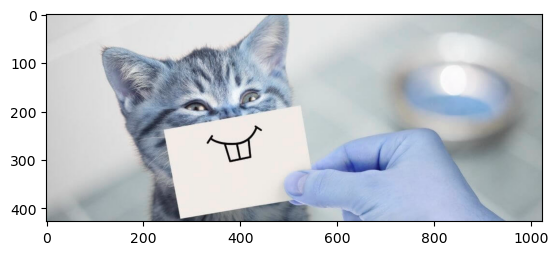

In [28]:
model_output("D:\demo13.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Probability :  0.076949365
its a cat


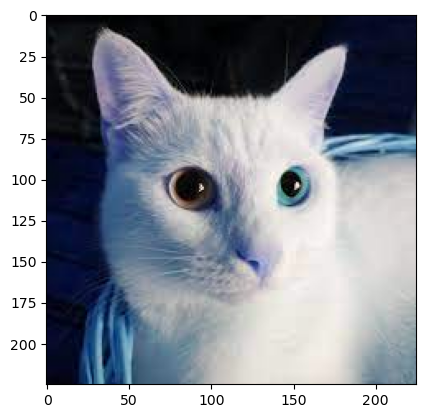

In [29]:
model_output("D:\demo12.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Probability :  0.45953703
its a cat


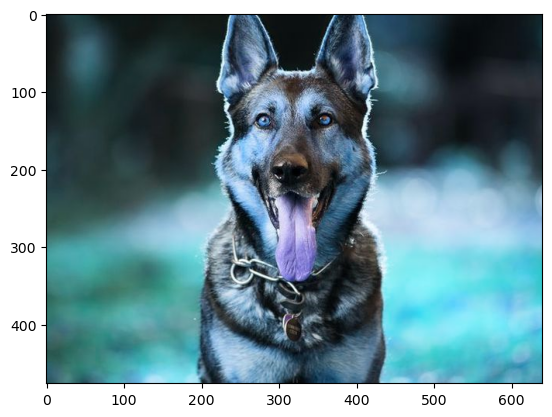

In [30]:
model_output("D:\demo7.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Probability :  0.0036823768
its a cat


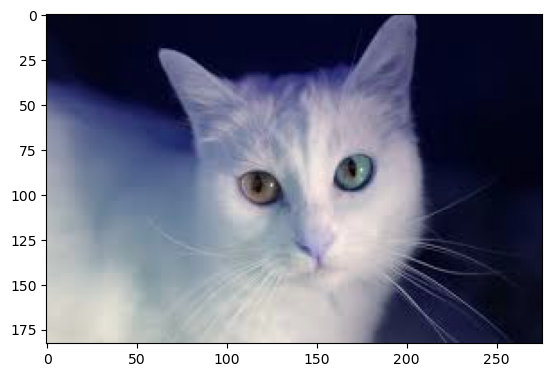

In [31]:
model_output("D:\demo4.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Probability :  0.0018013384
its a cat


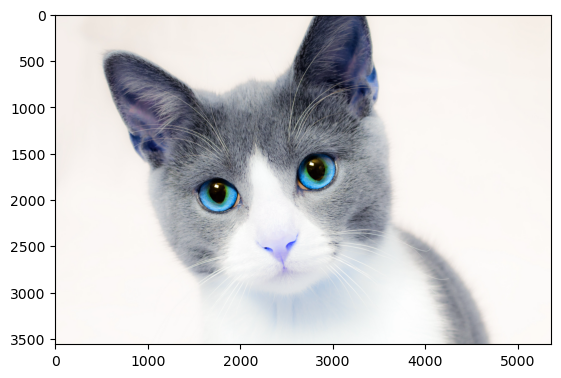

In [32]:
model_output("D:\demo3.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Probability :  0.99538964
its a dog


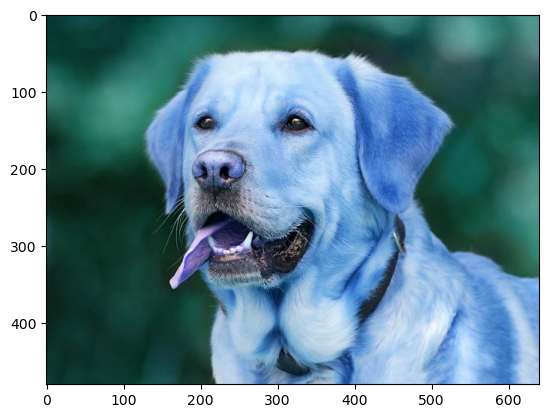

In [33]:
model_output("D:\demo1.jpg")

# Finish